In [5]:
import pandas as pd

data = pd.read_csv('./spam.csv', encoding="ISO-8859-1")

In [8]:
data = data[['text','labels']]
data.head()

,text,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


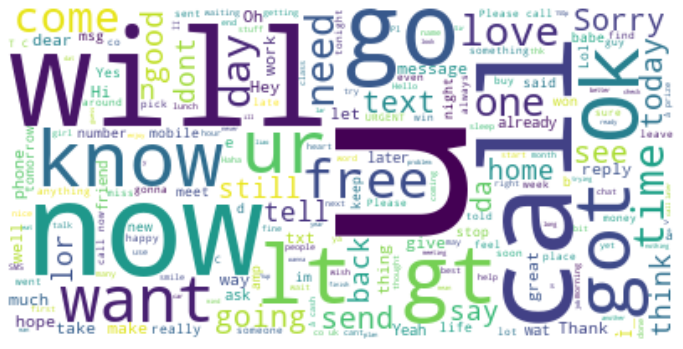

In [10]:
from wordcloud import WordCloud, STOPWORDS
text=' '.join(data['text'])
my_stopwords = set(STOPWORDS)
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(text)
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(my_cloud, interpolation='bilinear')

In [13]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
port=WordNetLemmatizer()

In [18]:

def preprocess(text):
    def tokenizing(text2):
        return word_tokenize(text2)
    
    def removeword(text3):
        return [w for w in text3 if not w in stop_words]
    
    def stemming(removeStopWords):
        return [port.lemmatize(word) for word in removeStopWords]
    
    return " ".join(stemming(removeword(tokenizing(re.sub(r'[^\w\s]', '', text.lower())))))

In [19]:
preprocess_text = data.text.apply(preprocess)

In [20]:
preprocess_text.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: text, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(preprocess_text)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
X=pd.DataFrame(values.toarray(), columns = feature_names)
X

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,åôrents,ì_,ì_ll,ìï,ìïll,û_,û_thanks,ûï,ûïharry,ûò
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.378219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y = label_encoder.fit_transform(data.labels)

In [37]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [42]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
GB = gnb.predict(X_test)
GB_Accuracy=metrics.accuracy_score(y_test, GB)
print("Accuracy:",GB_Accuracy)


Accuracy: 0.8797846889952153


In [43]:
gbr=classification_report(y_test,GB)
print(gbr)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1463
           1       0.51      0.90      0.65       209

    accuracy                           0.88      1672
   macro avg       0.75      0.89      0.79      1672
weighted avg       0.92      0.88      0.89      1672



In [46]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()

#Train the model using the training sets
mnb.fit(X_train, y_train)

#Predict the response for test dataset
MB = mnb.predict(X_test)
mb_Accuracy=metrics.accuracy_score(y_test, MB)
print("Accuracy:",mb_Accuracy)


Accuracy: 0.9599282296650717


In [47]:
mbr=classification_report(y_test,MB)
print(mbr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1463
           1       1.00      0.68      0.81       209

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.96      1672

